In [4]:
!pip install matplotlib.pyplot
!pip install seaborn
!pip install pandas
!pip install numpy
!pip install geopandas

ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot

[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [53]:
df = pd.read_csv('cian_parsing_result_sale_1_100_moskva_18_Nov_2023_23_04_31_527788.csv', sep=';')
df.head()

,author,author_type,link,city,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price_per_m2,price,district,street,house_number,underground,residential_complex
0,ANT Development,developer,https://www.cian.ru/sale/flat/291563636/,Москва,sale,flat,28,34,2,51.2,954271,48858726,Дорогомилово,Поклонная,9,Парк Победы,Поклонная 9
1,SHOW ME,real_estate_agent,https://www.cian.ru/sale/flat/291778742/,Москва,sale,flat,37,37,-1,135.3,923872,125000000,Хорошевский,Ленинградский проспект,37/6,Аэропорт,Прайм Парк
2,ANT Development,developer,https://www.cian.ru/sale/flat/283856103/,Москва,sale,flat,10,34,3,86.8,1177508,102207781,Дорогомилово,Поклонная,9,Парк Победы,Поклонная 9
3,LaRichesse,real_estate_agent,https://www.cian.ru/sale/flat/281332469/,Москва,sale,flat,5,6,3,111.0,608018,67490000,Беговой,3-я Ямского Поля,9,Белорусская,Art Residence
4,ANT Development,developer,https://www.cian.ru/sale/flat/291385930/,Москва,sale,flat,26,34,4,134.1,966340,129586246,Дорогомилово,Поклонная,9,Парк Победы,Поклонная 9


In [3]:
df.isnull().sum()

author                   0
author_type              0
link                     0
city                     0
deal_type                0
accommodation_type       0
floor                    0
floors_count             0
rooms_count              0
total_meters             0
price_per_m2             0
price                    0
district                66
street                 138
house_number           159
underground             31
residential_complex    287
dtype: int64

In [5]:
df = df.dropna(subset=('residential_complex', 'house_number', 'district', 'street', 'underground'))

In [6]:
df.isna().sum()

author                 0
author_type            0
link                   0
city                   0
deal_type              0
accommodation_type     0
floor                  0
floors_count           0
rooms_count            0
total_meters           0
price_per_m2           0
price                  0
district               0
street                 0
house_number           0
underground            0
residential_complex    0
dtype: int64

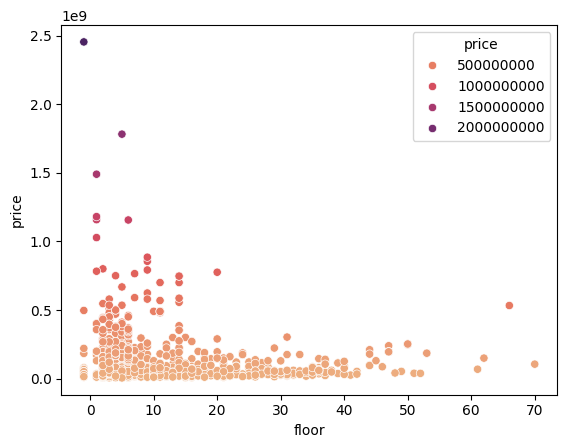

In [7]:
sns.scatterplot(data=df, x="floor", y="price", hue='price', palette='flare')
plt.title('')
plt.show()

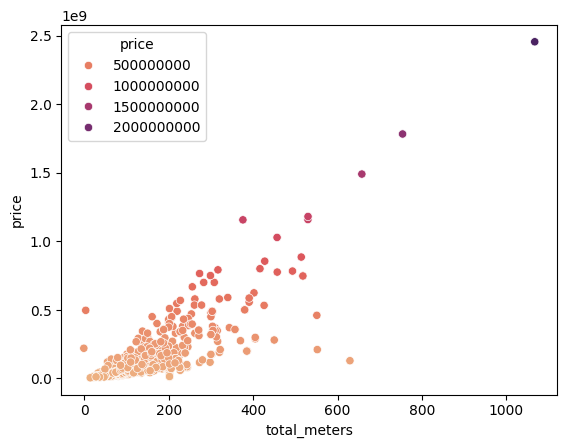

In [8]:
sns.scatterplot(data=df, x="total_meters", y="price", hue='price', palette='flare')
plt.show()

C:\Users\vadim\AppData\Local\Temp\ipykernel_10216\1023717943.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=out, x=out.values(), y=out.keys(), palette='flare')


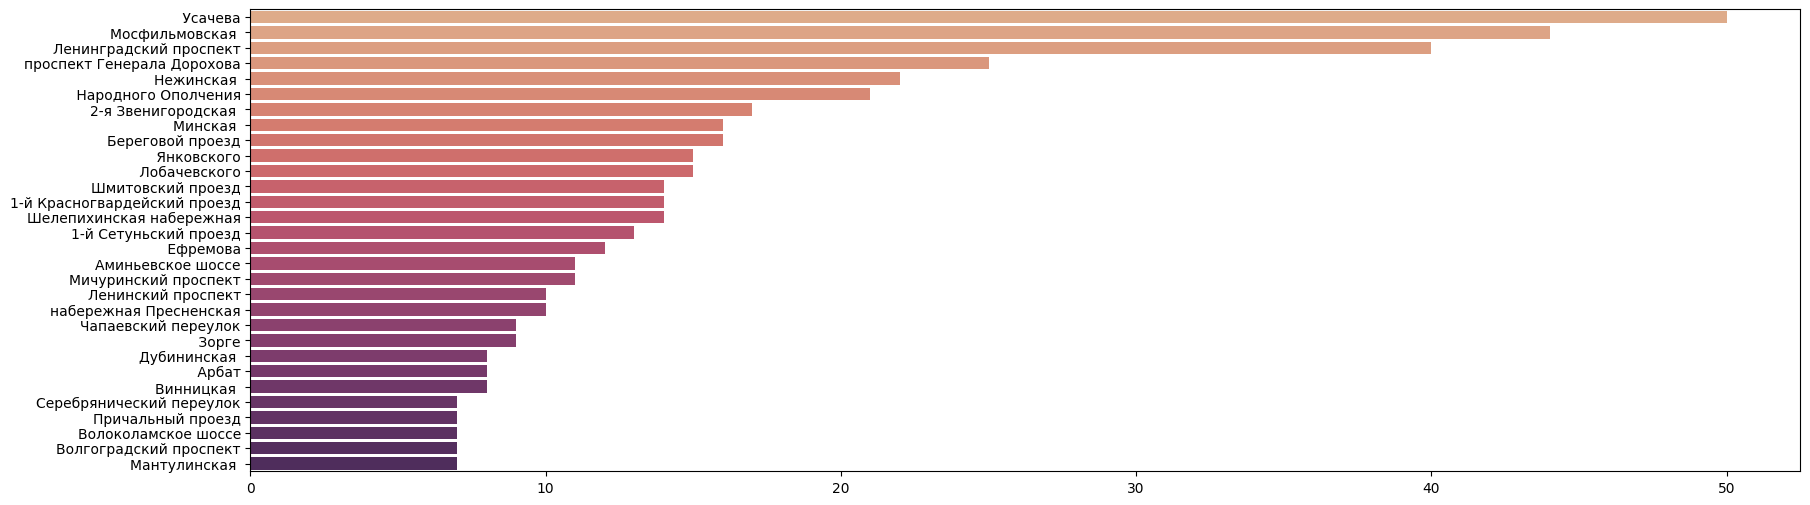

In [9]:
from collections import Counter
from itertools import islice

location_count = Counter(df['street'])
out = Counter()
location_count = dict(location_count.most_common(30))
out.update(dict(islice(location_count.items(), 30)))
plt.figure(figsize=(20,6))
sns.barplot(data=out, x=out.values(), y=out.keys(), palette='flare')
plt.show()

In [10]:
from collections import Counter
import geopandas as gpd

In [11]:
geodata = gpd.read_file('mo.geojson')

In [12]:
geodata = geodata[['NAME', 'geometry']]
prices_mean = df.groupby('district')['price'].mean()
df_price = pd.DataFrame(prices_mean)
df_price = df_price.reset_index()
geodata = geodata.rename(columns={"NAME": 'district'})

price_map = geodata.set_index('district').join(df_price.set_index('district'))
price_map = price_map.reset_index()

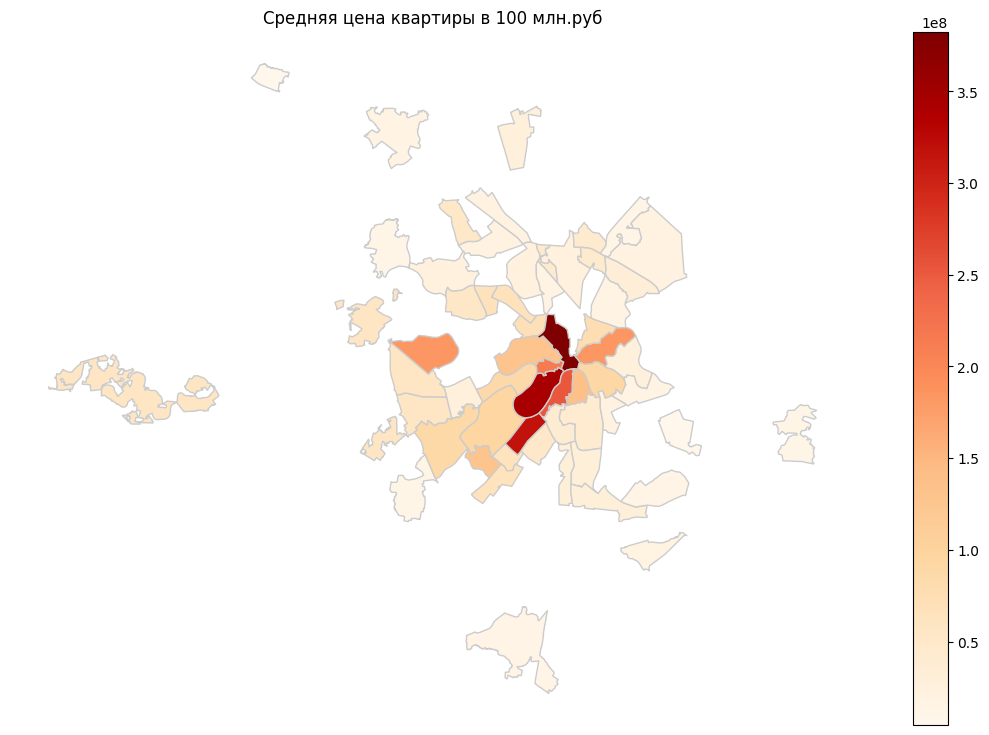

In [31]:
fig, ax = plt.subplots(1, figsize=(15, 9))

price_map.plot(column= 'price',
               cmap='OrRd',
               linewidth=1,
               ax=ax,
               edgecolor='0.8',
               legend=True,
               legend_kwds={'orientation': "vertical"},
                )
ax.axis('off')
plt.title('Cредняя цена квартиры в 100 млн.руб')
plt.show()

C:\Users\vadim\AppData\Local\Temp\ipykernel_10216\1295228661.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(area_counts, palette='flare')


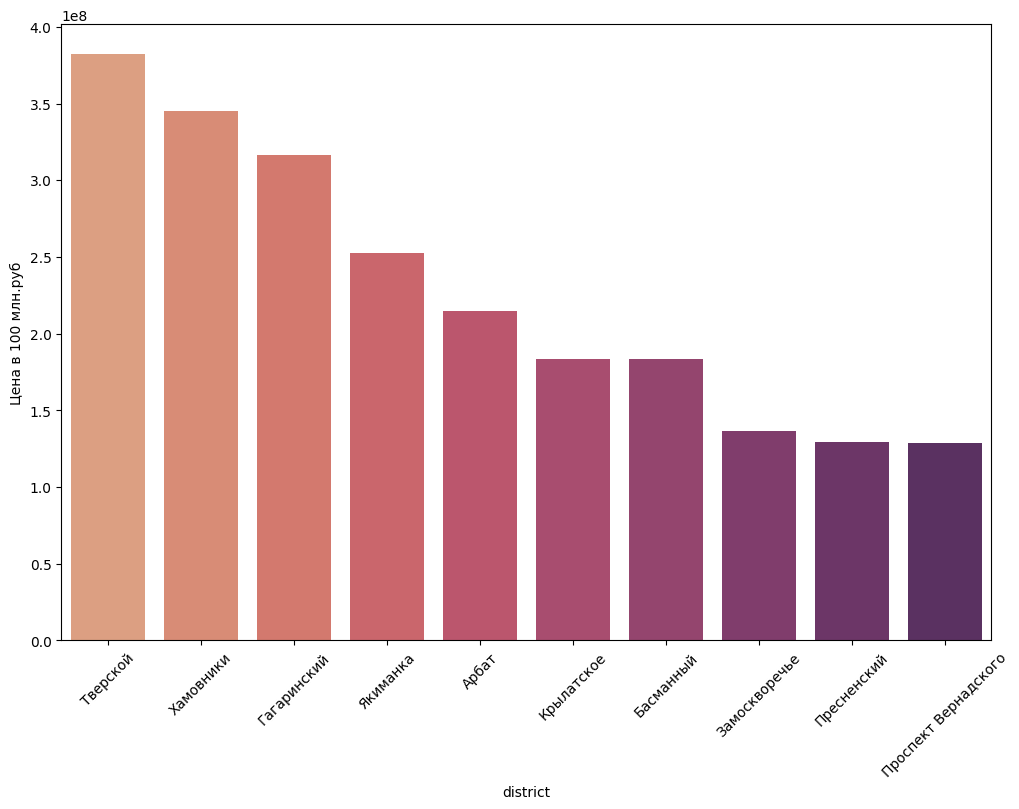

In [28]:
area_counts = prices_mean.nlargest(10)
plt.figure(figsize=(12,8))
sns.barplot(area_counts, palette='flare')
plt.xticks(rotation=45)
plt.ylabel('Цена в 100 млн.руб')
plt.show()

C:\Users\vadim\AppData\Local\Temp\ipykernel_10216\32774031.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(complex_counts, palette='flare')


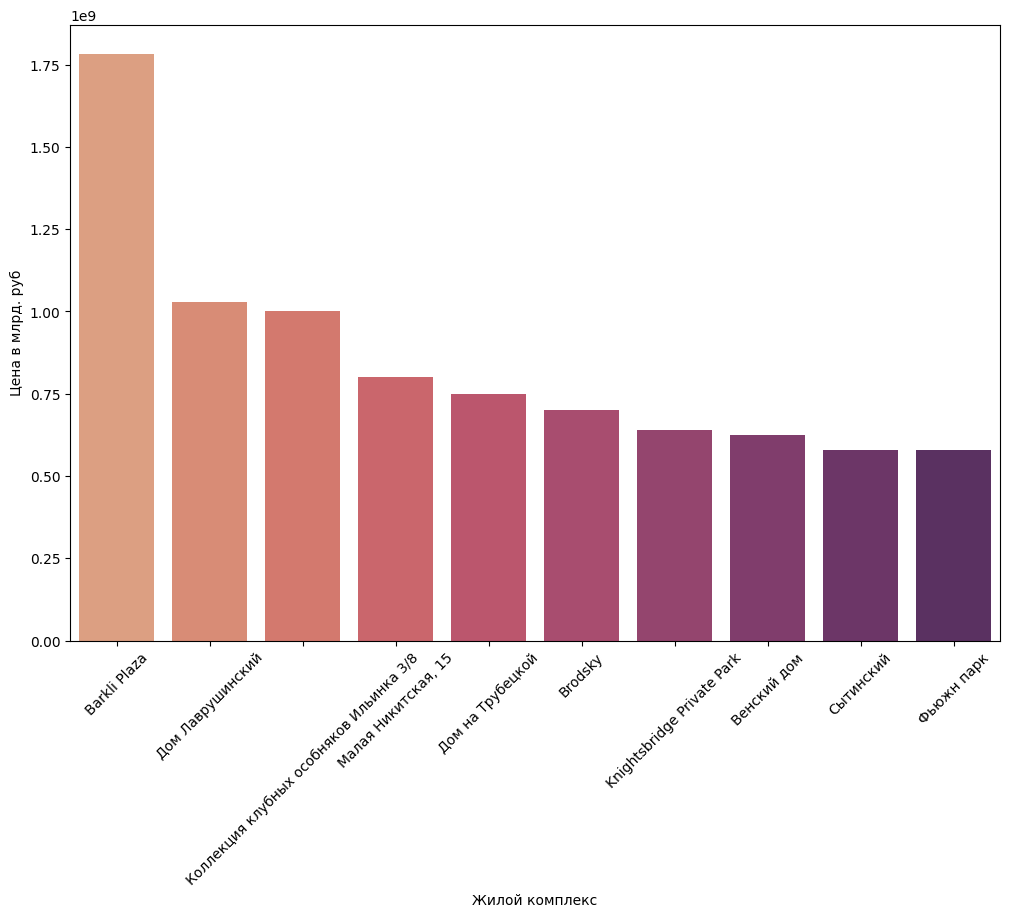

In [15]:
complex_prices = df.groupby('residential_complex')['price'].mean()
complex_counts = complex_prices.nlargest(10)
plt.figure(figsize=(12,8))
sns.barplot(complex_counts, palette='flare')
plt.xticks(rotation=45)
plt.ylabel('Цена в млрд. руб')
plt.xlabel('Жилой комплекс')
plt.show()

In [54]:
df = df.drop(['author', 'author_type', 'link', 'city', 'deal_type', 'accommodation_type', 'street', 'underground', 'house_number'],  axis=1)
print(df.head())

   floor  floors_count  rooms_count  total_meters  price_per_m2      price  \
0     28            34            2          51.2        954271   48858726   
1     37            37           -1         135.3        923872  125000000   
2     10            34            3          86.8       1177508  102207781   
3      5             6            3         111.0        608018   67490000   
4     26            34            4         134.1        966340  129586246   

       district residential_complex  
0  Дорогомилово         Поклонная 9  
1   Хорошевский          Прайм Парк  
2  Дорогомилово         Поклонная 9  
3       Беговой       Art Residence  
4  Дорогомилово         Поклонная 9  


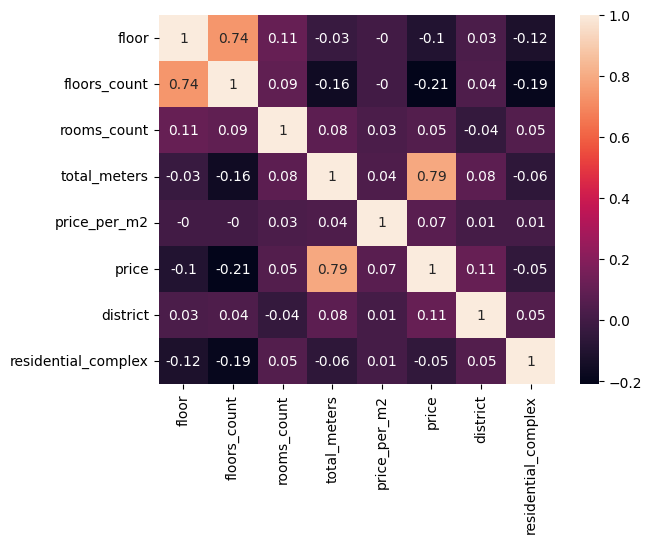

In [57]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df[['district', 'residential_complex']] = df[['district', 'residential_complex']].apply(le.fit_transform)
corr_matrix = df.corr().round(2)
sns.heatmap(data=corr_matrix, annot=True)
plt.show()